# Digital Text in the Humanities

#### Color palette:

- <span style="color:#EE6352">Fire opal</span>: for sub-titles;
- <span style="color:#89FC00">Chartreuse web</span>: for function's names;
- <span style="color:#FEC9F1">Cotton candy</span>: for female parts;
- <span style="color:#A3C4BC">Opal</span>: for male parts; 
- <span style="color:#F0A202">Marigold</span>: for stats parts;

## Project work

In [1]:
from normalization_functions import *
from analytics_functions import *
from sentiment_functions import *
from visualizations_functions import *

### Section 1: Corpora & Texts

#### 1.1) Corpora creation and presentation

During this first step, the aim is to create the two distinct corpora over which our project is based:

In [2]:
f_directory = "Raw/F/"
m_directory = "Raw/M/"
f_corpus = create_corpus(f_directory)
m_corpus = create_corpus(m_directory)

At this point, we extract the urls and titles of all the texts in our corpora in order to visualize them:

In [3]:
f_authors_texts = list()
f_titles = list()
for url in f_corpus.fileids():
    if url != '.DS_Store':
        f_authors_texts.append(f_directory+url)
        f_titles.append(url[:-4])

m_authors_texts = list()
m_titles = list()
for url in m_corpus.fileids():
    if url != '.DS_Store':
        m_authors_texts.append(m_directory+url)
        m_titles.append(url[:-4])

print("URLS of female authors texts:", f_authors_texts, '\n')
print("Titles of female authors texts:", f_titles, '\n')
print("URLS of male authors texts:", m_authors_texts, '\n')
print("Titles of male authors texts:", m_titles, '\n')

URLS of female authors texts: ['Raw/F/1857_grannys_wonderful_chair.txt', 'Raw/F/1857_the_rambles_of_a_rat.txt', 'Raw/F/1869_little_women.txt', 'Raw/F/1869_mrs_overtheways_remembrances.txt', 'Raw/F/1872_a_dog_of_flanders.txt', 'Raw/F/1877_black_beauty.txt', 'Raw/F/1877_the_cuckoo_clock.txt', 'Raw/F/1886_little_lord_fauntleroy.txt', 'Raw/F/1899_the_story_of_the_treasure_seekers.txt', 'Raw/F/1902_the_tale_of_peter_rabbit.txt', 'Raw/F/1903_rebecca_of_sunnybrook_farm.txt', 'Raw/F/1908_anne_of_green_gables.txt', 'Raw/F/1911_the_secret_garden.txt'] 

Titles of female authors texts: ['1857_grannys_wonderful_chair', '1857_the_rambles_of_a_rat', '1869_little_women', '1869_mrs_overtheways_remembrances', '1872_a_dog_of_flanders', '1877_black_beauty', '1877_the_cuckoo_clock', '1886_little_lord_fauntleroy', '1899_the_story_of_the_treasure_seekers', '1902_the_tale_of_peter_rabbit', '1903_rebecca_of_sunnybrook_farm', '1908_anne_of_green_gables', '1911_the_secret_garden'] 

URLS of male authors texts: 

#### 1.2) Basic analytics: Dimensions

The first thing we should analyze is the dimension of our corpora.

In order to do that we will use the following two functions contained in the [analytics file](analytics_functions.py):
- <span style="color:#EDAE49">corpus_size</span>: useful in order to compute the total number of texts in each corpus;
- <span style="color:#EDAE49">corpus_dimension</span>: thought in order to determine the total number of tokens in a corpus.

In [4]:
print("The size of our corpus of female authors is:", corpus_size(f_corpus))
print("The size of our corpus of male authors is:", corpus_size(m_corpus))

The size of our corpus of female authors is: 13
The size of our corpus of male authors is: 8


In [5]:
print("The dimension of our corpus of female authors is:", corpus_dimension(f_directory))
print("The dimension of our corpus of male authors is:", corpus_dimension(m_directory))

The dimension of our corpus of female authors is: 797175
The dimension of our corpus of male authors is: 798740


Now, what we want to do is to compute the lexical richeness of the texts contained in each corpus.</br>
In order to do that, we will use the <span style="color:#89FC00">lexical_richeness</span> function, that will compute the lexical richeness of each text and return a dictionary in which such values will be stored.

In addition to the different values, we have also used some interactive graphical representations (taken from the [NotebookJS repository](https://github.com/jorgehpo/notebookJS)) to display differences between texts.

In [6]:
f_author_richness = lexical_richness(f_authors_texts)

file = "Visualizations/f_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/f_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in f_author_richness:
    print(key[11:-4], ":", f_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(f_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/f_lexical_richness.csv")

grannys_wonderful_chair : 0.10592697124713353
the_rambles_of_a_rat : 0.14052779778665445
little_women : 0.05623331064453636
mrs_overtheways_remembrances : 0.10719462492113027
a_dog_of_flanders : 0.18703924734957522
black_beauty : 0.06745258670929284
the_cuckoo_clock : 0.13014949766860548
little_lord_fauntleroy : 0.07892194253750318
the_story_of_the_treasure_seekers : 0.07457838621474318
the_tale_of_peter_rabbit : 0.3944954128440367
rebecca_of_sunnybrook_farm : 0.10553530444174429
anne_of_green_gables : 0.06944847265752913
the_secret_garden : 0.05787025880765338


In [7]:
m_author_richness = lexical_richness(m_authors_texts)

file = "Visualizations/m_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/m_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in m_author_richness:
    print(key, ":", m_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(m_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/m_lexical_richness.csv")

Raw/M/1857_tom_browns_school_days.txt : 0.08352087554978663
Raw/M/1865_alices_adventures_in_wonderland.txt : 0.09396832364022092
Raw/M/1869_david_copperfield.txt : 0.03824850505662873
Raw/M/1871_at_the_back_of_the_north_wind.txt : 0.057148611002338305
Raw/M/1876_the_adventures_of_tom_sawyer.txt : 0.09812937468447695
Raw/M/1883_treasure_island.txt : 0.08336663051544038
Raw/M/1888_the_happy_prince_and_other_tales.txt : 0.13101049548450086
Raw/M/1894_the_jungle_book.txt : 0.08745792533659731


Once we have such measures of lexical richness, we can move on by computing the mean of them.

In [8]:
f_lexical_richness_total = 0
for key in f_author_richness:
    f_lexical_richness_total += f_author_richness[key]
print("The average lexical richness of the female authors corpus is:", f_lexical_richness_total/corpus_size(f_corpus))

The average lexical richness of the female authors corpus is: 0.12118260106385678


In [9]:
m_lexical_richness_total = 0
for key in m_author_richness:
    m_lexical_richness_total += m_author_richness[key]
print("The average lexical richness of the male authors corpus is:", m_lexical_richness_total/corpus_size(m_corpus))

The average lexical richness of the male authors corpus is: 0.08410634265874876


<i>Such kind of analysis, based on lexical richness, will be re-used later in order to have a  measure to compare the corpora</i>.

For now, the only conclusion that we can draw from this first step is that in our corpora, female authors use a richer lexicon with respect to male authors.

<span style="color:red">Some considerations about representativeness and balance of corpora TO BE ADDED</span>

### Section 2: Gender classification

#### 2.1) Creation of useful elements to analyze the corpora

In this second section, we aim at creating some basic elements useful to store and control the information that we will extract from our corpora and to compute some statistics.</br>
This first analysis has been performed by reusing, enhancing and modifying (also by adding a sentiment analysis of sentences) the code used by <b>Neal Caren</b> in his project ["Using Python to see how the Times writes about men and women"](http://nealcaren.github.io/text-as-data/html/times_gender.html).

As a first step we will need two different sets of words associated with female and male context.</br>
Such sets have been taken from the <span style="color:#B4D6D3">[Jailbreak-the-Patriarchy Project](https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)</span> and enhanced where necessary, according to our view and to our context.

In [10]:
male_words=set(['guy','dr','spokesman','chairman',"men's",'men','him',"he's",'his','boy',
'boyfriend','boyfriends','boys','brother','brothers','dad','dads','dude','father',
'fathers','fiance','gentleman','gentlemen','god','grandfather','grandpa',
'grandson','groom','he','himself','his','husband','pastor','husbands','king','male','man',
'mr','nephew','nephews','priest','prince','son','sons','uncle','uncles',
'waiter','widower','widowers','he','he is','lord','master'])

female_words=set(['heroine','drss','spokeswoman','chairwoman',"women's",'actress','women',
"she's",'her','aunt','aunts','bride','daughter','daughters','female','fiancee','girl',
'girlfriend','girlfriends','girls','goddess','granddaughter','grandma','grandmother',
'herself','ladies','lady','mom','moms','mother','mothers','mrs','ms','niece',
'nieces','priestess','princess','queens','she','sister','sisters','waitress',
'widow','widows','wife','wives','woman','she','she is','lady','mistress','queen'])

Seen that we are working with children's literature, one possible issue is the recognition of animals and the possible imbalance that may derive in the statistics.</br>
To avoid the problem, we took this [animals name txt file](https://gist.github.com/atduskgreg/3cf8ef48cb0d29cf151bedad81553a54) and compiled a list from it.</br>
Such list will be useful to clear the words that we will analyze in the following steps.

In [11]:
animals = text_reader("Useful elements and texts/animals_list.txt")
animals_list = list()
for row in animals.split():
  animals_list.append(row.lower())
animals_list = set(animals_list)

The same will be performed for a list of common words that we have taken from the [reddit analysis project](https://github.com/rhiever/reddit-analysis/blob/master/redditanalysis/words/common-words.txt).

In [12]:
commons = text_reader("Useful elements and texts/common_ws_list.txt")
common_ws_list = list()
for row in commons.split():
  common_ws_list.append(row.lower())
common_ws_list = set(common_ws_list)

Now, we need some dictionaries in order to store the data extracted from corpora. Such <i>dictionaries</i> will be created starting from a list of <i>gender definition terms</i> and they will be proper of each corpus and will contain the following information and elements:
- <span style="color:#EDAE49">sentence_counter</span>: this first dictionary will be useful in order to count the total number of gendered sentences in each text (and, by consequence, in each corpus);
- <span style="color:#EDAE49">word_counter</span>: this will contain the raw count of the whole words associated with gendered sentences;
- <span style="color:#EDAE49">word_freq</span>: finally, this last dictionary will contain the specific count of each one of the words associated to a gendered sentence.

In [13]:
list_of_gender = ['male','female','mainly_male','mainly_female','none','both']

Now that we have the list of possible <i>gender classifications</i>, we procede by creating the dictionaries for our corpora.</br>
Such dictionaries will begin with an <span style="color:#B4D6D3">f</span> if associated with the corpus of female authors and with an <span style="color:#B4D6D3">m</span> if associated to the corpus of male authors.

In [14]:
f_sentence_counter = {sex:0 for sex in list_of_gender}
f_word_counter = {sex:0 for sex in list_of_gender}
f_word_freq = {sex:{} for sex in list_of_gender}
f_sent_dict = {}

m_sentence_counter = {sex:0 for sex in list_of_gender}
m_word_counter = {sex:0 for sex in list_of_gender}
m_word_freq = {sex:{} for sex in list_of_gender}
m_sent_dict = {}

Now, we need to create two dictionaries to save all the words used by female and male authors in a raw count.

In [15]:
male_authors_raw_count = dict()
female_authors_raw_count = dict()

We will also need two dictionaries in which we can store proper nouns extracted from our corpora.

In [16]:
f_proper_nouns = {}
m_proper_nouns = {}

Then, we procede by creating the two dictionaries for emotion analysis, one for each corpus.

In [17]:
f_emotions = dict()
m_emotions = dict()

Finally, we need to create some sets in which we will store the extracted common words for each specific case.

In [18]:
#For female authors
f_male_general = set()
f_male_nouns = set()
f_male_verbs = set()
f_male_adjectives = set()

f_female_general = set()
f_female_nouns = set()
f_female_verbs = set()
f_female_adjectives = set()

#For male authors
m_male_general = set()
m_male_nouns = set()
m_male_verbs = set()
m_male_adjectives = set()

m_female_general = set()
m_female_nouns = set()
m_female_verbs = set()
m_female_adjectives = set()

Once we have created our dictionaries, sets and lists, we can move a step forward and start to analyze our corpora.

#### 2.2) Corpus analysis - Female authors 

Let's start by analyzing the <i>corpus of female authors</i>.

##### 2.2.a) Sentiment analysis
<b>Raw scores</b>

The first thing we may want to do is to analyze it thanks to the functions contained in the document for the [gender classification of sentences](sentiment_functions.py).</br>
In particular, we will call the main function of this file, that is <span style="color:#EDAE49">gender_analysis</span>, on each text in our "female authors corpus".

In [19]:
for url in f_authors_texts:
    text = text_reader(url)
    gender_analysis(text, f_sent_dict, f_sentence_counter, f_word_counter, female_authors_raw_count, f_word_freq, f_proper_nouns, male_words, female_words)

As you can see in the source code for the <span style="color:#EDAE49">gender_analysis function</span>, we have used a function to store all the possible proper_nouns (this choice has been driven by the less accurate POS-tagging classification of NNP - by means "Proper Nouns").

Thanks to this script we have analyzed, gendered and given a polarity score as well as a qualitative sentiment label to the sentences of each one of the texts contained inside the reference corpus and we have fulfilled the dictionaries related to such corpus.

As a last step of this first part of the process, we will first print out the differences between gendered and not-gendered sentences in terms of raw percentages of gendered sentences. </br>
Then, by following a statistical analysis of our sentences in this corpus, we will also try to determine if the differences between the way in which female authors deal with male and female sentences. In particular, what we aim to do is to determine wether the mean of the sentences related sentiment scores are significantly different.

In [20]:
print ('%.1f%% gendered.' % (100*(f_sentence_counter['male'] + f_sentence_counter['female'])/
                           (f_sentence_counter['male'] + f_sentence_counter['female'] + f_sentence_counter['mainly_female'] + 
                           f_sentence_counter['mainly_male'] + f_sentence_counter['both'] + f_sentence_counter['none'])))
print ('%s sentences about men.' % f_sentence_counter['male'])
print ('%s sentences about women.' % f_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (f_sentence_counter['male']/f_sentence_counter['female']))

43.3% gendered.
9728 sentences about men.
8919 sentences about women.
1.1 sentences about men for each sentence about women.


##### 2.2.b) Statistical analysis of sentiment's scores

Once determined some raw percentages and a raw count of the sentences contained in the female authors corpus, we will compute a statistical analysis regarding the means of the scores for female and male sentences inside this corpus.

----------

<b><u>Data extraction</b></u>

As a first step, we need to create some lists in which we will store the scores and the sentiment labels.

In [21]:
f_f_labels = list()
f_m_labels = list()
f_f_scores = list()
f_m_scores = list()

Now, we extract the scores that have been previously saved inside the output dictionary of the gender analysis and we store them in the above defined lists.

In [22]:
for sentence in f_sent_dict:
    if f_sent_dict[sentence]["gender"] == "female":
        f_f_scores.append(f_sent_dict[sentence]["score"])
        f_f_labels.append(f_sent_dict[sentence]["polarity"])
    elif f_sent_dict[sentence]["gender"] == "male":
        f_m_scores.append(f_sent_dict[sentence]["score"])
        f_m_labels.append(f_sent_dict[sentence]["polarity"])

-------

<b><u>Raw statistics</u></b>

Now, we will display the dimensions of the extracted populations.

###### Raw statistics for female sentences

In [23]:
pos = 0
neg = 0
neu = 0
for pol in f_f_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"female gendered sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 8907 female gendered sentences written by female authors we have these results:


The number of positive sentences is: 3945
The number of negative sentences is: 2250
The number of neutral sentences is: 2712


###### Raw statistics for male sentences

In [24]:
pos = 0
neg = 0
neu = 0
for pol in f_m_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"male gendered sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 9712 male gendered sentences written by female authors we have these results:


The number of positive sentences is: 4145
The number of negative sentences is: 2229
The number of neutral sentences is: 3338


-------

<b><u>Sample building</u></b>

Seen that the aim of the analysis is to see wether a significant difference between the means of the two different sets of score (for male and female related sentences) exists, we will try to perform a <span style="color:#EE6352"><i>t-test for independence</i></span>.</br>
In order to be able to perform such statistical test, we first need to create two equally large samples. The dimension of the sample will be of 1500 scores each (number decided by looking at theoverall counts of sentences).

The sampling operation is computed for both female and male related sentences that has a positive or negative score. Neutral sentences will not be considered in this first analysis because of the fact that we do not think that their values should be taken into account in order to perform an analysis that tries to higlight a possible difference between the average score of female and male sentences.</br>
Behind this choice there is the fact that by analyzing some of the sentences extracted, we noticed that neutral sentences are not essential for the analysis because many times are referred to landscapes descriptions made by female or male characters. 

###### Data preparation

First of all, in order to prepare the stratified sampling operation we should remove all the neutral scores and labels from our lists.</br>
With the output of this first operation we create a dictionary representing the population to sample, that will be given as input to the <span style="color:#EDAE49">stratified_random_sampling function</span> that can be found in the [analytics functions file]("analytics_functions.py).

In [25]:
# Remove neutral scores in female sentences
for score in f_f_scores:
    if score == 0:
        f_f_scores.remove(score)
# Remove neutral labels in female sentences
for label in f_f_labels:
    if label == "NEU":
        f_f_labels.remove(label)
# Remove neutral scores in male sentences
for score in f_m_scores:
    if score == 0:
        f_m_scores.remove(score)
# Remove neutral labels in male sentences
for label in f_m_labels:
    if label == "NEU":
        f_m_labels.remove(label)

Once the remove operation has been successfully accomplished, as said before, we create a dictionary to represent the entire population:

In [26]:
# Female sentences population dictionary
f_f_population = {
    "scores":f_f_scores,
    "labels":f_f_labels
}
# Male sentences population dictionary
f_m_population = {
    "scores":f_m_scores,
    "labels":f_m_labels
} 

###### SRS (Stratified Random Sampling) operation

Now we can begin with the sampling operation:

In [27]:
f_samples = stratified_random_sampling([f_f_population,f_m_population], 1000)
f_f_sample = f_samples[0]
f_m_sample = f_samples[1]

-----

<b><u>T-Test assumptions check</u></b>
- <b><u>Distribution</u></b>

Once we have our samples, we need to check for the assumptions of the <span style="color:#EE6352"><i>t-test</i></span>:</br>
- Continuous or ordinal scale of measurement: this one is easily comfermed by simply looking at the scores;
- Data must be collected from a representative, randomly selected and reasonably large sample size of the total population: again, this has yet been accomlished by the random sampling performed in the previous step;
- Data must be follow the rules of a normal distribution (we will consider the standard htreshold of 5%): in order to check for this assumption we wrote the <span style="color:#EDAE49">check_distribution</span> function that you can find in the [analytics functions file](analytics_functions.py), and we will use it to analyze the distribution of data;
- Homogeneity of variance: in order to check this last assumption we will use a function contained in the [analytics functions file](analytics_functions.py) that allow us to perform an <span style="color:#EE6352"><i>F-test</i></span>.

Starting from the sentences about female, we will check for the kind of distribution that our data follow.</br>
In particular, we look for a normal distribution in order to meaningfully compare the extracted means of the data related to positive and negative sentences inside and outside this corpora. In fact, in this first stage of the process, we will try to see if there is a statistically significant difference between the ways in which female authors deal with men and women, and how they treat gendered sentences. </br>
After that, we will compute the mean and the std of the sentences we are dealing with (only if the distribution is normal).


In order to highligth some hidden details of our data, we decided to transform them thanks to a <span style="color:#EE6352"><i>BoxCox transformation</i></span>.</br>
Finally, we will display a graph that shows the distribution of the scores.

###### Normality assumption check for distribution of female sentences

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.2492205124179414
The mean is: 0.08996278203286213
The std is: 0.2830383771785496
So, data follow a normal distribution.


(0.08996278203286213, 0.2830383771785496)

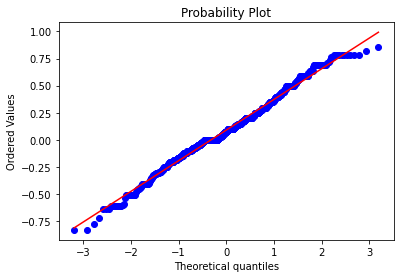

In [28]:
check_distribution(f_f_sample)

###### Normality assumption check for distribution of male sentences

The same must be accomplished also for male gendered sentences written by female authors.

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.08893247888221144
The mean is: 0.09769849479203145
The std is: 0.2787138403187465
So, data follow a normal distribution.


(0.09769849479203145, 0.2787138403187465)

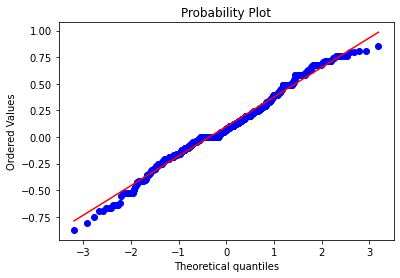

In [29]:
check_distribution(f_m_sample)

---------------

<b><u>T-Test assumptions check</u></b>
- <b><u>Homogeneity of variances</u></b>

We can now perform an <span style="color:#EE6352"><i>F-test</i></span> on the variances of the two samples.

In [30]:
f_test(f_f_sample, f_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.031272840358125
The p-value is: 0.31444443706822156
The two variances do not differ in a significant way


(1.031272840358125, 0.31444443706822156)

-------

<b><u>T-Test for independent samples</u></b>

We can now move on into testing our data in order to see wether the means of scores related to female and male gendered sentences differ in a significant way.</br>
In order to check that, we will perform a <span style="color:#EE6352"><i>t-test for independent samples</i></span> by using the <span style="color:#EDAE49">t_test_independent</span> function contained in the [analytics functions file](analytics_functions.py).

In [31]:
t_test_independent(f_f_sample, f_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.6898522571499355
The two means (0.09061066263737666 0.09606169227650531) do not differ in a significant way.


Ttest_indResult(statistic=-0.3991134612012426, pvalue=0.6898522571499355)

<b><u><span style="color:#EE6352">INTERPRETATION</span></u></b>

<i>According to the results of a two-tailed t-test for independent samples, there are not enough evidences to reject the null hypothesis. In fact, we are sufficiently confident that the average scores extracted from the samples, that are representative of the two populations, do not differ in a significant way. Thus, we can say that <span style="color:#EFC7C2"><b>female authors do not reflect any particular difference in the way in which, by a sentimental point of view, speaks about men and women</b></span>.</i>

--------

##### 2.2.c) Emotion extraction

Finally, we can move on into seeing the emotions related data that have been extracted from our corpus.</br>
In order to do that, we will make use of the function <span style="color:#EDAE49">emotion_frequencies</span> contained in the [sentiment functions file](sentiment_functions.py).

In [106]:
for url in f_authors_texts:
    f_emotions = emotion_frequencies(url, f_emotions)
del f_emotions["anticip"]
for emo in f_emotions:
    f_emotions[emo] = np.mean(f_emotions[emo])
f_emotions

{'fear': 0.06293502262407556,
 'anger': 0.04677662286777559,
 'trust': 0.1251548474883779,
 'surprise': 0.06047199564577541,
 'positive': 0.21338689050520712,
 'negative': 0.14315125719160715,
 'sadness': 0.07432633497582566,
 'disgust': 0.044396665521867426,
 'joy': 0.11356427029301583,
 'anticipation': 0.11583609288647242}

##### 2.2.d) Common words extraction

Now, we extract the proper nouns contained in our texts.</br> <span style="color:red">According to our code, proper nouns are such words which appear capitalized with a probability of 100% inside our text in a position different from the first position of each sentence (as the function to recognize them states).</span></br>
Moreover, some particular situations have been taken into account (an example of it is the occurence of "I" and of punctuation, these have been considered and removed from the list of proper nouns).

In [33]:
f_proper_nouns_set = set([word for word in f_proper_nouns if  
                        f_proper_nouns[word].get('upper',0) / 
            (f_proper_nouns[word].get('upper',0) + f_proper_nouns[word].get('lower',0)) 
                        == 1])
f_proper_nouns_set.add("ida")
f_proper_nouns_set.add("fauntleroy")
f_proper_nouns_set.add("oddity")
f_proper_nouns_set.add("earl's")
f_proper_nouns_set.add("hobbs")

Then, in order to display some statistics about the words used in gendered sentences, we first need to compute a list of the most <span style="color:#F7D6E0">common words in female and male sentences</span> that female authors tend to use inside the texts that compose the related corpus.</br>
The easiest way to do that is to retrieve our sorted <i>word_freq</i> dictionaries and to take out from these the most common words from the '<u><i>female</i></u>' and '<u><i>male</i></u>' keys.</br>
From such list we will need to take out all the words used together with a specific gender classification.

In [34]:
f_common_words=set([w for w in sorted (f_word_freq['female'],key=f_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (f_word_freq['male'],key=f_word_freq['male'].get,reverse=True)[:1000]])
f_common_words=list(f_common_words-male_words-female_words-f_proper_nouns_set-animals_list-common_ws_list)

The first operation to perform, on the common_words list, is to POS-tag the words that are stored inside it.</br>
Such POS-tagged words will be placed inside a dictionary and we will print out all the different POS in order to perform a more accurate analysis of the corpus in the subsequent stages.</br>
The decision to use the universal POS-tagger is due to the fact that tagging operations in NLP are not so accurate, therefore we preferred to use a more general (so, with less definens) tagset.

In [35]:
f_tagged_words = {}
for word in pos_tagging(f_common_words, True):
    if word[1] not in f_tagged_words:
        f_tagged_words[word[1]] = []
    f_tagged_words[word[1]].append(word[0])
print(f_tagged_words.keys())   

dict_keys(['NOUN', 'VERB', 'ADJ', 'ADV', 'ADP', 'PRON', 'NUM', 'DET', 'PRT'])


Once we have our list of common words and the dictionary containing POS-tagged words, what we need to do is to compute the ratio of each one of the words for what concerns its relative presence in male and female gendered sentences.</br></br>
In this step we took into consideration the possibility that a word may appear the same amount of time for both genders but, one possible situation is when it appears 10 times, for example, in 50 male sentences and 10 times in 200 female sentences. Basically, that is the reason behind the necessity to compute its <i>relative frequency</i>.</br></br>
In such particular situations, we must be aware of the possible imbalance between occurrences and sentences. </br>
This is the reason that led us to compute the percentage of presence of our target word in male sentences, with respect to the percentage of presence of the same target word over the totality of sentences (also female).</br></br>
Finally, in order to obtain the female sentences percentage of occurrency of a specific word, we will just need to compute the inverse percentage.

In [36]:
f_male_percent = { word :
     (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
     (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
      f_word_freq['male'].get(word,0)/f_word_counter['male']) 
    for word in f_common_words if word in f_tagged_words["NOUN"] or word in f_tagged_words["VERB"] or word in f_tagged_words["ADJ"]}

Once we have computed such male percentages, we will display our results in a tabular form.</br>
In particular, we will display the 50 most common words (if exist) for female and male contexts, that has <b>a ratio of presence higher than 3</b>, that means only those words which appear at least 2 times for a gender out of 1 time for the other.</br> 
All the words which appear just for one of the two main genders (f & m) will be displayed with a ratio = 100 by default.

Moreover, we enhance the precision of the analysis by storing such words, as well as the 50 most common nouns, verbs and adjectives related to female and male contexts.</br></br>
All these words will be placed inside some different sets that we will analyze in a qualitative way in the following sections.</br> </br>
First for female words and then for male words, again in reference corpus, thats is in this case for texts with female authors.

-----

<b><u>Female related common words in female authors corpus</u></b>

In [37]:
print('COMMON WORDS')
print('Female words in the female author corpus')
common_words_df(f_word_freq, f_male_percent, f_female_general, False)

COMMON WORDS
Female words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,braid,100.00,23,0,1.0000,0.0000
1,faded,22.25,21,1,0.9570,0.0430
2,frock,10.59,20,2,0.9137,0.0863
3,lace,8.83,25,3,0.8983,0.1017
4,maid,8.74,33,4,0.8973,0.1027
5,bonnet,8.48,24,3,0.8945,0.1055
6,knitting,7.42,21,3,0.8812,0.1188
7,dress,7.31,138,20,0.8797,0.1203
8,shawl,6.71,19,3,0.8703,0.1297
9,charity,6.62,25,4,0.8688,0.1312


<b><u>Male related common words in female authors corpus</u></b>

In [38]:
print('COMMON WORDS')
print('Male words in the female author corpus')
common_words_df(f_word_freq, f_male_percent, f_male_general, True)

COMMON WORDS
Male words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,lordship,100.00,0,63,0.0000,1.0000
1,doublet,100.00,0,20,0.0000,1.0000
2,stable,51.92,1,55,0.0189,0.9811
3,robber,33.98,1,36,0.0286,0.9714
4,bob,30.21,1,32,0.0320,0.9680
5,race,27.37,1,29,0.0352,0.9648
6,earl,18.03,10,191,0.0526,0.9474
7,pipe,15.10,2,32,0.0621,0.9379
8,fellow,13.89,7,103,0.0672,0.9328
9,footman,9.44,3,30,0.0958,0.9042


---------

<b><u>Common nouns in female authors corpus</u></b>

Now we will extract the most common nouns related to gendered sentences.</br>
Again, as a pre-requisite to perform such operation, we will create a dictionary of percentages.

In [39]:
f_male_nouns_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["NOUN"]}

Now we can extract common nouns:

- <b><u>Female related common nouns in female authors corpus</u></b>

In [40]:
print('NOUNS')
print('Female nouns in the female author corpus')
common_words_df(f_word_freq, f_male_nouns_percent, f_female_nouns, False)

NOUNS
Female nouns in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,braid,100.00,23,0,1.0000,0.0000
1,frock,10.59,20,2,0.9137,0.0863
2,lace,8.83,25,3,0.8983,0.1017
3,bonnet,8.48,24,3,0.8945,0.1055
4,knitting,7.42,21,3,0.8812,0.1188
5,shawl,6.71,19,3,0.8703,0.1297
6,charity,6.62,25,4,0.8688,0.1312
7,class,4.77,45,10,0.8266,0.1734
8,imagination,3.88,22,6,0.7953,0.2047
9,success,3.88,22,6,0.7953,0.2047


- <b><u>Male related common nouns in female authors corpus</u></b>

In [41]:
print('NOUNS')
print('Male nouns in the female author corpus')
common_words_df(f_word_freq, f_male_nouns_percent, f_male_nouns, True)

NOUNS
Male nouns in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,doublet,100.00,0,20,0.0000,1.0000
1,bob,30.21,1,32,0.0320,0.9680
2,race,27.37,1,29,0.0352,0.9648
3,pipe,15.10,2,32,0.0621,0.9379
4,footman,9.44,3,30,0.0958,0.9042
5,hut,9.44,2,20,0.0958,0.9042
6,cart,8.87,5,47,0.1013,0.8987
7,editor,6.92,3,22,0.1262,0.8738
8,rein,5.93,7,44,0.1442,0.8558
9,cab,5.66,7,42,0.1501,0.8499


---------

<b><u>Common verbs in female authors corpus</u></b>

In [42]:
f_male_verbs_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["VERB"]}

- <b><u>Female related common verbs in female authors corpus</u></b>

In [43]:
print('VERBS')
print('Female verbs in the female author corpus')
common_words_df(f_word_freq, f_male_verbs_percent, f_female_verbs, False)

VERBS
Female verbs in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,faded,22.25,21,1,0.9570,0.0430
1,lap,5.51,26,5,0.8464,0.1536
2,pink,5.19,49,10,0.8385,0.1615
3,sighed,5.06,43,9,0.8350,0.1650
4,pale,4.56,56,13,0.8203,0.1797
5,dressed,3.71,42,12,0.7876,0.2124
6,loving,3.31,25,8,0.7680,0.2320
7,rosy,3.18,27,9,0.7607,0.2393
8,finding,3.05,23,8,0.7528,0.2472
9,clasped,3.03,20,7,0.7517,0.2483


- <b><u>Male related common verbs in female authors corpus</u></b>

In [44]:
print('VERBS')
print('Male verbs in the female author corpus')
common_words_df(f_word_freq, f_male_verbs_percent, f_male_verbs, True)

VERBS
Male verbs in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,riding,5.66,4,24,0.1501,0.8499
1,killed,5.43,4,23,0.1556,0.8444
2,captain,4.72,9,45,0.1748,0.8252
3,brave,3.91,7,29,0.2036,0.7964
4,sold,3.46,6,22,0.2242,0.7758


--------

<b><u>Common adjectives in female authors corpus</u></b>

In [45]:
f_male_adjectives_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["ADJ"]}

- <b><u>Female related common adjectives in female authors corpus</u></b>

In [46]:
print('ADJECTIVES')
print('Female adjectives in the female author corpus')
common_words_df(f_word_freq, f_male_adjectives_percent, f_female_adjectives, False)

ADJECTIVES
Female adjectives in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,maid,8.74,33,4,0.8973,0.1027
1,dress,7.31,138,20,0.8797,0.1203
2,gable,3.88,44,12,0.7953,0.2047
3,precious,3.35,19,6,0.7704,0.2296
4,pillow,3.18,42,14,0.7607,0.2393
5,tongue,3.06,26,9,0.7537,0.2463


- <b><u>Male related common adjectives in female authors corpus</u></b>

In [47]:
print('ADJECTIVES')
print('Male adjectives in the female author corpus')
common_words_df(f_word_freq, f_male_adjectives_percent, f_male_adjectives, True)

ADJECTIVES
Male adjectives in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,lordship,100.00,0,63,0.0000,1.0000
1,stable,51.92,1,55,0.0189,0.9811
2,robber,33.98,1,36,0.0286,0.9714
3,earl,18.03,10,191,0.0526,0.9474
4,fellow,13.89,7,103,0.0672,0.9328
5,lame,9.44,2,20,0.0958,0.9042
6,polite,6.92,3,22,0.1262,0.8738
7,indian,6.61,5,35,0.1314,0.8686
8,saddle,5.66,4,24,0.1501,0.8499
9,animal,5.29,5,28,0.1591,0.8409


----------

#### 2.3) Corpus analysis - Male authors 

The same kind of analysis based on classifications of sentences with respect to their gender will be performed in this section.


Obviously, this time we will analyze the male authors corpus, so we will make use of the other dictionaries.

In [48]:
for url in m_authors_texts:
    text = text_reader(url)
    gender_analysis(text, m_sent_dict, m_sentence_counter, m_word_counter, male_authors_raw_count, m_word_freq, m_proper_nouns, male_words, female_words)

In [49]:
print ('%.1f%% gendered.' % (100*(m_sentence_counter['male'] + m_sentence_counter['female'])/
                           (m_sentence_counter['male'] + m_sentence_counter['female'] + m_sentence_counter['both'] + 
                           m_sentence_counter['none'])))
print ('%s sentences about men.' % m_sentence_counter['male'])
print ('%s sentences about women.' % m_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (m_sentence_counter['male']/m_sentence_counter['female']))

43.1% gendered.
13082 sentences about men.
5154 sentences about women.
2.5 sentences about men for each sentence about women.


##### 2.3.b) Statistical analysis of sentiment's scores

Now, without an additional explanation of the process (you can find it in the previous statistical analysis - in this section we will repeat the same exact operation done above but with data extracted from the male authors corpus), we can move on and analyze the sentiment scores extracted from this other corpus.

----------

<b><u>Data extraction</b></u>

In [50]:
m_f_labels = list()
m_m_labels = list()
m_f_scores = list()
m_m_scores = list()

In [51]:
for sentence in m_sent_dict:
    if m_sent_dict[sentence]["gender"] == "female":
        m_f_scores.append(m_sent_dict[sentence]["score"])
        m_f_labels.append(m_sent_dict[sentence]["polarity"])
    elif m_sent_dict[sentence]["gender"] == "male":
        m_m_scores.append(m_sent_dict[sentence]["score"])
        m_m_labels.append(m_sent_dict[sentence]["polarity"])

-------

<b><u>Raw statistics</u></b>

###### Raw statistics for female sentences

In [52]:
pos = 0
neg = 0
neu = 0
for pol in m_f_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"female gendered sentences written by male authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 5145 female gendered sentences written by male authors we have these results:


The number of positive sentences is: 2083
The number of negative sentences is: 1188
The number of neutral sentences is: 1874


###### Raw statistics for male sentences

In [53]:
pos = 0
neg = 0
neu = 0
for pol in m_m_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"male gendered sentences written by male authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 13051 male gendered sentences written by male authors we have these results:


The number of positive sentences is: 5475
The number of negative sentences is: 3099
The number of neutral sentences is: 4477


-------

<b><u>Sample building</u></b>

###### Data preparation

In [54]:
# Remove neutral scores in female sentences
for score in m_f_scores:
    if score == 0:
        m_f_scores.remove(score)
# Remove neutral labels in female sentences
for label in m_f_labels:
    if label == "NEU":
        m_f_labels.remove(label)
# Remove neutral scores in male sentences
for score in m_m_scores:
    if score == 0:
        m_m_scores.remove(score)
# Remove neutral labels in male sentences
for label in m_m_labels:
    if label == "NEU":
        m_m_labels.remove(label)

In [55]:
# Female sentences population dictionary
m_f_population = {
    "scores":m_f_scores,
    "labels":m_f_labels
}
# Male sentences population dictionary
m_m_population = {
    "scores":m_m_scores,
    "labels":m_m_labels
} 

###### SRS (Stratified Random Sampling) operation

In [56]:
m_samples = stratified_random_sampling([m_f_population,m_m_population], 1000)
m_f_sample = m_samples[0]
m_m_sample = m_samples[1]

-----

<b><u>T-Test assumptions check</u></b>
- <b><u>Distribution</u></b>

###### Normality assumption check for distribution of female sentences

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.12413548467012042
The mean is: 0.0844500675838761
The std is: 0.2741461148053881
So, data follow a normal distribution.


(0.0844500675838761, 0.2741461148053881)

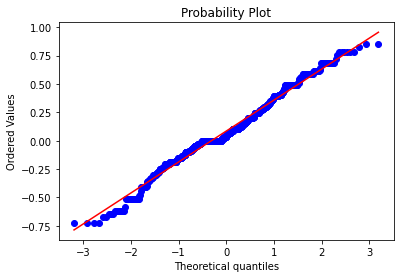

In [57]:
check_distribution(m_f_sample)

###### Normality assumption check for distribution of male sentences

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.0922961183048613
The mean is: 0.08248624177058111
The std is: 0.2821017009839376
So, data follow a normal distribution.


(0.08248624177058111, 0.2821017009839376)

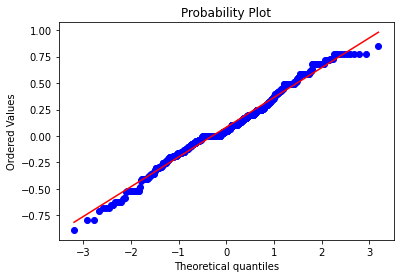

In [58]:
check_distribution(m_m_sample)

---------------

<b><u>T-Test assumptions check</u></b>
- <b><u>Homogeneity of variances</u></b>

In [59]:
f_test(m_f_sample, m_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0588811539011727
The p-value is: 0.18452805302809772
The two variances do not differ in a significant way


(1.0588811539011727, 0.18452805302809772)

-------

<b><u>T-Test for independent samples</u></b>

In [60]:
t_test_independent(m_f_sample, m_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.6098109305476143
The two means (0.08552904297443792 0.09233214405205147) do not differ in a significant way.


Ttest_indResult(statistic=-0.5104239667257706, pvalue=0.6098109305476143)

<b><u><span style="color:#EE6352">INTERPRETATION</span></u></b>

<i>According to the results of a two-tailed t-test for independent samples, there are not enough evidences to reject the null hypothesis. In fact, we are sufficiently confident that the average scores extracted from the samples, that are representative of the two populations, do not differ in a significant way. Thus, we can say that <span style="color:#EFC7C2"><b>male authors do not reflect any particular difference in the way in which, by a sentimental point of view, speaks about men and women</b></span>.</br>
Although, in this corpus we can spot a difference in the overall amount of sentences tha male authors write about male, in fact we can easily notice that in this situation we have <span style="color:#EFC7C2"><b>2.5 male gendered sentences for each female gendered sentence</b></span>.</i>

--------

##### 2.3.c) Emotion extraction

Finally, we can move on, as we have done above, into seeing the emotions related data that have been extracted from this corpus.

In [104]:
for url in m_authors_texts:
    m_emotions = emotion_frequencies(url, m_emotions)
del m_emotions["anticip"]
for emo in m_emotions:
    m_emotions[emo] = np.mean(m_emotions[emo])
m_emotions

{'fear': 0.0765327527447873,
 'anger': 0.058570860876075805,
 'trust': 0.12777640538508248,
 'surprise': 0.05542325946319686,
 'positive': 0.20247409824195226,
 'negative': 0.14815799461266427,
 'sadness': 0.07614521951424554,
 'disgust': 0.04414467483588512,
 'joy': 0.09853928601290532,
 'anticipation': 0.11223544831320503}

##### 2.3.d) Common words extraction

As we have done above, we will go on by extracting all the common words used in gendered sentences.

In [62]:
m_proper_nouns_set = set([word for word in m_proper_nouns if  
                        m_proper_nouns[word].get('upper',0) / 
            (m_proper_nouns[word].get('upper',0) + m_proper_nouns[word].get('lower',0)) 
                        == 1])
m_proper_nouns_set.add("janet")
m_proper_nouns_set.add("east")
m_proper_nouns_set.add("nag")
m_proper_nouns_set.add("jack")
m_proper_nouns_set.add("squire")
m_proper_nouns_set.add("gray")
m_proper_nouns_set.add("mell")
m_proper_nouns_set.add("brown")
m_proper_nouns_set.add("ben")
m_proper_nouns_set.add("han")

m_common_words=set([w for w in sorted (m_word_freq['female'],key=m_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (m_word_freq['male'],key=m_word_freq['male'].get,reverse=True)[:1000]])
m_common_words=list(m_common_words-male_words-female_words-m_proper_nouns_set-animals_list-common_ws_list)

In [63]:
m_tagged_words = {}
for word in pos_tagging(m_common_words, True):
    if word[1] not in m_tagged_words:
        m_tagged_words[word[1]] = []
    m_tagged_words[word[1]].append(word[0])

---------

<b><u>Common words in male authors corpus</u></b>

In [64]:
m_male_percent = { word :
     (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
     (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
      m_word_freq['male'].get(word,0)/m_word_counter['male']) 
    for word in m_common_words if word in m_tagged_words["NOUN"] or word in m_tagged_words["VERB"] or word in m_tagged_words["ADJ"]}

- <b><u>Female related common words in male authors corpus</u></b>

In [65]:
print('COMMON WORDS')
print('Female words in the male author corpus')
common_words_df(m_word_freq, m_male_percent, m_female_general, False)

COMMON WORDS
Female words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,fender,100.00,11,0,1.0000,0.0000
1,bonnet,100.00,24,0,1.0000,0.0000
2,fan,12.59,18,4,0.9264,0.0736
3,dress,11.82,38,9,0.9220,0.0780
4,kiss,10.14,29,8,0.9103,0.0897
5,beauty,10.07,18,5,0.9097,0.0903
6,curl,10.07,18,5,0.9097,0.0903
7,trot,9.79,42,12,0.9074,0.0926
8,dearest,8.40,15,5,0.8936,0.1064
9,current,8.40,15,5,0.8936,0.1064


- <b><u>Male related common words in male authors corpus</u></b>

In [66]:
print('COMMON WORDS')
print('Male words in the male author corpus')
common_words_df(m_word_freq, m_male_percent, m_male_general, True)

COMMON WORDS
Male words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,coffee,100.00,0,30,0.0000,1.0000
1,rum,100.00,0,35,0.0000,1.0000
2,fag,100.00,0,31,0.0000,1.0000
3,jungle,24.66,1,69,0.0390,0.9610
4,pipe,20.37,1,57,0.0468,0.9532
5,stable,12.86,1,36,0.0721,0.9279
6,skin,12.51,1,35,0.0740,0.9260
7,brave,11.79,1,33,0.0782,0.9218
8,luck,11.44,1,32,0.0804,0.9196
9,trunk,11.08,1,31,0.0828,0.9172


------

<b><u>Common nouns in male authors corpus</u></b>

In [67]:
m_male_nouns_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["NOUN"]}

- <b><u>Female related common nouns in male authors corpus</u></b>

In [68]:
print('NOUNS')
print('Female nouns in the male author corpus')
common_words_df(m_word_freq, m_male_nouns_percent, m_female_nouns, False)

NOUNS
Female nouns in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,bonnet,100.00,24,0,1.0000,0.0000
1,fan,12.59,18,4,0.9264,0.0736
2,dress,11.82,38,9,0.9220,0.0780
3,beauty,10.07,18,5,0.9097,0.0903
4,curl,10.07,18,5,0.9097,0.0903
5,trot,9.79,42,12,0.9074,0.0926
6,affectionate,8.40,12,4,0.8936,0.1064
7,tender,7.28,13,5,0.8792,0.1208
8,cousin,7.28,13,5,0.8792,0.1208
9,mill,6.47,37,16,0.8662,0.1338


- <b><u>Male related common nouns in male authors corpus</u></b>

In [69]:
print('NOUNS')
print('Male nouns in the male author corpus')
common_words_df(m_word_freq, m_male_nouns_percent, m_male_nouns, True)

NOUNS
Male nouns in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,coffee,100.00,0,30,0.0000,1.0000
1,rum,100.00,0,35,0.0000,1.0000
2,fag,100.00,0,31,0.0000,1.0000
3,jungle,24.66,1,69,0.0390,0.9610
4,skin,12.51,1,35,0.0740,0.9260
5,teeth,8.40,2,47,0.1064,0.8936
6,coat,7.62,3,64,0.1160,0.8840
7,enemy,7.50,2,42,0.1176,0.8824
8,study,7.24,4,81,0.1214,0.8786
9,rush,6.61,2,37,0.1314,0.8686


-------

<b><u>Common verbs in male authors corpus</u></b>

In [70]:
m_male_verbs_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["VERB"]}

- <b><u>Female related common verbs in male authors corpus</u></b>

In [71]:
print('VERBS')
print('Female verbs in the male author corpus')
common_words_df(m_word_freq, m_male_verbs_percent, m_female_verbs, False)

VERBS
Female verbs in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,clasped,5.60,14,7,0.8484,0.1516
1,sobbing,5.20,13,7,0.8386,0.1614
2,trembled,5.13,11,6,0.8369,0.1631
3,kissed,4.83,19,11,0.8286,0.1714
4,fairy,4.76,17,10,0.8263,0.1737
5,married,4.20,27,18,0.8076,0.1924
6,darling,4.20,12,8,0.8076,0.1924
7,loving,4.04,13,9,0.8017,0.1983
8,loved,3.73,44,33,0.7886,0.2114
9,folded,3.66,17,13,0.7854,0.2146


- <b><u>Male related common verbs in male authors corpus</u></b>

In [72]:
print('VERBS')
print('Male verbs in the male author corpus')
common_words_df(m_word_freq, m_male_verbs_percent, m_male_verbs, True)

VERBS
Male verbs in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,brave,11.79,1,33,0.0782,0.9218
1,luck,11.44,1,32,0.0804,0.9196
2,trunk,11.08,1,31,0.0828,0.9172
3,hit,6.08,2,34,0.1413,0.8587
4,ten,3.17,8,71,0.2397,0.7603
5,paid,3.13,4,35,0.2423,0.7577
6,entered,3.04,6,51,0.2477,0.7523


----------

<b><u>Common verbs in male authors corpus</u></b>

In [73]:
m_male_adjectives_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["ADJ"]}

- <b><u>Female related common verbs in male authors corpus</u></b>

In [74]:
print('ADJECTIVES')
print('Female adjectives in the male author corpus')
common_words_df(m_word_freq, m_male_adjectives_percent, m_female_adjectives, False)

ADJECTIVES
Female adjectives in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,fender,100.00,11,0,1.0000,0.0000
1,kiss,10.14,29,8,0.9103,0.0897
2,dearest,8.40,15,5,0.8936,0.1064
3,current,8.40,15,5,0.8936,0.1064
4,cheerful,7.35,21,8,0.8802,0.1198
5,needle,6.72,12,5,0.8704,0.1296
6,childish,5.60,14,7,0.8484,0.1516
7,sweet,4.90,28,16,0.8304,0.1696
8,beautiful,4.48,56,35,0.8174,0.1826
9,miss,4.17,228,153,0.8066,0.1934


- <b><u>Male related common verbs in male authors corpus</u></b>

In [75]:
print('ADJECTIVES')
print('Male adjectives in the male author corpus')
common_words_df(m_word_freq, m_male_adjectives_percent, m_male_adjectives, True)

ADJECTIVES
Male adjectives in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,pipe,20.37,1,57,0.0468,0.9532
1,stable,12.86,1,36,0.0721,0.9279
2,ball,6.19,3,52,0.1390,0.8610
3,wise,4.17,3,35,0.1935,0.8065
4,pack,4.11,4,46,0.1957,0.8043
5,verse,3.81,3,32,0.2078,0.7922
6,forty,3.81,3,32,0.2078,0.7922
7,public,3.57,4,40,0.2186,0.7814
8,wall,3.00,10,84,0.2499,0.7501


----------

### Section 3: Graphical representations & Statistics

In this section, we aim to compute the concordances of the most common words in each corpus.</br>
Moreover, we will display some graphical representations of our data.</br>
Whatever will come out from this part of the analysis will be analyzed in the subsequent section in order to draw some conclusions about the differences that may exist between texts written by authors with different genders.

#### 3.1) Concordances

In this section, we aim at analyzing what we have extracted from the previous step.</br>
In particular, the first kind of analysis has the purpose of printing out the concordances for each one of the most common words in female and male context. Obviously, such kind of analysis will take place for each one of our corpus.</br>
The extracted concordances can be found in files called:
- <span style="color:#EE6352">f_f_words.txt</span>, 
- <span style="color:#EE6352">f_m_words.txt</span>, 
- <span style="color:#EE6352">m_f_words.txt</span> and 
- <span style="color:#EE6352">m_m_words.txt</span>.


Such files can be found in the [Concordances directory](Concordances/).

<i>If you want to re-use such notebook, in this section you will not find the code to save concordances into the directory, that's because we have decided to use the NLTK built in function to retrieve concordances.</br>
So, the best approach is to open the full output in a text editor and save it subsequently.</i>

##### 3.1.a) Female words in female authors corpus

In [76]:
for word in f_female_general:
    print(word, '\n')
    for url in f_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

sighed 

Raw/F/1857_grannys_wonderful_chair.txt
no matches
None 

Raw/F/1857_the_rambles_of_a_rat.txt
Displaying 3 of 3 matches:
 much increased since you left us," sighed oddity, "and where it will end i re
k." "i know he will not come back!" sighed oddity. "then why don't you come an
as fast as i could." "poor oddity!" sighed i very mournfully, "never was there
None 

Raw/F/1869_little_women.txt
Displaying 25 of 25 matches:
rug. “it’s so dreadful to be poor!” sighed meg, looking down at her old dress.
hings, and drink out of a tin mug,” sighed amy. “when will he come home, marme
mouth full. “if i only had a silk!” sighed meg. “mother says i may when i’m ei
em to take up our packs and go on,” sighed meg the morning after the party, fo
iles all round it. “what richness!” sighed jo, sinking into the depth of a vel
d to walk in the conservatory, beth sighed for the grand piano, and amy was ea
ng to think of those lovely limes,” sighed amy, with the air of a martyr. “i a
that of any mothe

##### 3.1.b) Male words in female authors corpus

In [77]:
# Check inutile, serve solo a bloccare l'esecuzione quando faccio run di test (rubano un botto di tempo)
r = False
if r:
    for word in f_male_general:
        print(word, '\n')
        for url in f_authors_texts:
            print(url)
            text = text_reader(url)
            print(word_concordances(word, text, False), '\n')
        print('\n')

##### 3.1.c) Female words in male authors corpus

In [78]:
# Check inutile, serve solo a bloccare l'esecuzione quando faccio run di test (rubano un botto di tempo)
r = False
if r:
    for word in m_female_general:
        print(word, '\n')
        for url in m_authors_texts:
            print(url)
            text = text_reader(url)
            print(word_concordances(word, text, False), '\n')
        print('\n')

##### 3.1.d) Male words in male authors corpus

In [79]:
# Check inutile, serve solo a bloccare l'esecuzione quando faccio run di test (rubano un botto di tempo)
r = False
if r:
    for word in m_male_general:
        print(word, '\n')
        for url in m_authors_texts:
            print(url)
            text = text_reader(url)
            print(word_concordances(word, text, False), '\n')
        print('\n')

#### 3.2) Word Clouds and frequency distributions

In this step, we want to generate two word clouds, based on the most used words by female and male authors.</br>
In order to do that, we need to clean better our data; we will compute this operation with regard to gendered words, proper names and, finally, words coming from the list of common words and the list of general animal names.</br></br>
Together with the word clouds, we will print out also some graphs concerning the frequency distributions of the 30 most common words in each of the two corpora.</br>
Such graphs will take be comprehensive of common words, as well as of stopwords.

In [80]:
to_remove = set()
for word in male_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del male_authors_raw_count[word]
for word in female_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del female_authors_raw_count[word]
for word in to_remove:
    try:
        del male_authors_raw_count[word]
    except:
        pass
    try:
        del female_authors_raw_count[word]
    except:
        pass

##### 3.2.a) Female authors

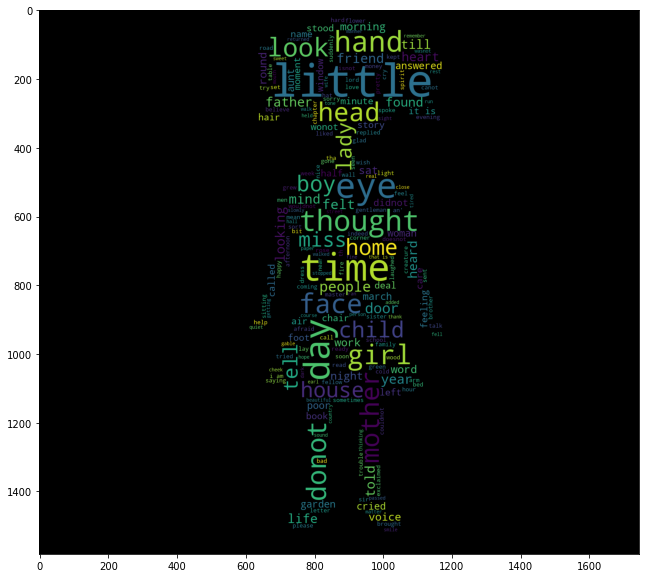

In [81]:
wordcloud_generator(female_authors_raw_count, False)

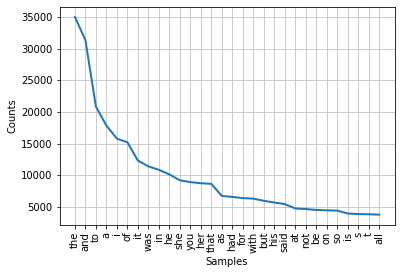

[('the', 35038),
 ('and', 31375),
 ('to', 20843),
 ('a', 17848),
 ('i', 15778),
 ('of', 15208),
 ('it', 12310),
 ('was', 11396),
 ('in', 10841),
 ('he', 10120),
 ('she', 9181),
 ('you', 8893),
 ('her', 8723),
 ('that', 8619),
 ('as', 6709),
 ('had', 6560),
 ('for', 6364),
 ('with', 6286),
 ('but', 5936),
 ('his', 5668),
 ('said', 5418),
 ('at', 4727),
 ('not', 4636),
 ('be', 4495),
 ('on', 4433),
 ('so', 4388),
 ('is', 3932),
 ('s', 3832),
 ('t', 3804),
 ('all', 3745)]

In [82]:
frequency_distribution(f_authors_texts, 30)

##### 3.2.b) Male authors

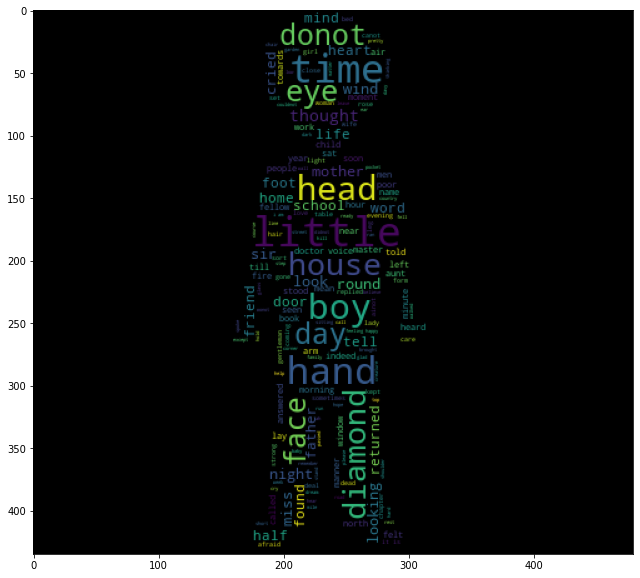

In [83]:
wordcloud_generator(male_authors_raw_count, True)

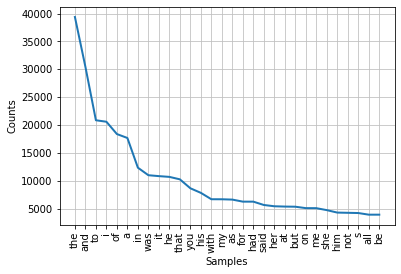

[('the', 39383),
 ('and', 30450),
 ('to', 20885),
 ('i', 20617),
 ('of', 18412),
 ('a', 17709),
 ('in', 12386),
 ('was', 11038),
 ('it', 10875),
 ('he', 10740),
 ('that', 10300),
 ('you', 8698),
 ('his', 7877),
 ('with', 6736),
 ('my', 6729),
 ('as', 6671),
 ('for', 6305),
 ('had', 6302),
 ('said', 5706),
 ('her', 5476),
 ('at', 5422),
 ('but', 5396),
 ('on', 5141),
 ('me', 5135),
 ('she', 4784),
 ('him', 4344),
 ('not', 4304),
 ('s', 4264),
 ('all', 3971),
 ('be', 3971)]

In [84]:
frequency_distribution(m_authors_texts, 30)

#### 3.4) Sentiment and emotion analysis

The purpose of this sub-section is maybe the most important one of this project.</br>
We will compute the differences between gendered sentences (together with polarity scores) and between the different emotional values that the authors transmit with their works.

<span style="color:red"><b><u>L'ANALISI SOTTO HA POCO SENSO (FORSE).</br>
AVREBBE COMUNQUE PIU SENSO (SICURAMENTE) CONTROLLARE SE CI SONO DIFFERENZE SIGNIFICATIVE:</u></b></span></br>
- <span style="color:red"><b><u>NEL MODO IN CUI UOMINI E DONNE PARLANO DI DONNE &</u></b></span>
- <span style="color:red"><b><u>NEL MODO IN CUI UOMINI E DONNE PARLANO DI UOMINI</u></b></span>

-----

<b><u>Samples</u></b>

In [85]:
# m_m vs f_m

m_m_population = {
    "scores":m_m_scores,
    "labels":m_m_labels
}

f_m_population = {
    "scores":f_m_scores,
    "labels":f_m_labels
}

# m_f vs f_f

m_f_population = {
    "scores":m_f_scores,
    "labels":m_f_labels
}

f_f_population = {
    "scores":f_f_scores,
    "labels":f_f_labels
}

<b><u>Male sentences</u></b>

In [86]:
samples = stratified_random_sampling([f_m_population,m_m_population], 1000)
f_m_sample = samples[0]
m_m_sample = samples[1]

<b><u>Female sentences</u></b>

In [87]:
samples = stratified_random_sampling([f_f_population,m_f_population], 1000)
f_f_sample = samples[0]
m_f_sample = samples[1]

--------

<b><u>Distributions</u></b>

<b><u>Male sentences</u></b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.054354901420251164
The mean is: 0.10278903393713756
The std is: 0.29179795641268663
So, data follow a normal distribution.


(0.10278903393713756, 0.29179795641268663)

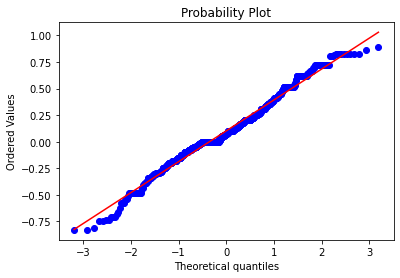

In [88]:
check_distribution(f_m_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.06981598888947695
The mean is: 0.09205140211672105
The std is: 0.27868185672392626
So, data follow a normal distribution.


(0.09205140211672105, 0.27868185672392626)

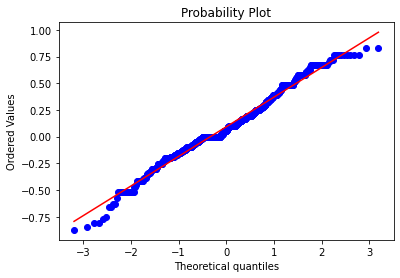

In [89]:
check_distribution(m_m_sample)

<b><u>Female sentences</u></b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.07716670393776034
The mean is: 0.0962222528788328
The std is: 0.28302333268363117
So, data follow a normal distribution.


(0.0962222528788328, 0.28302333268363117)

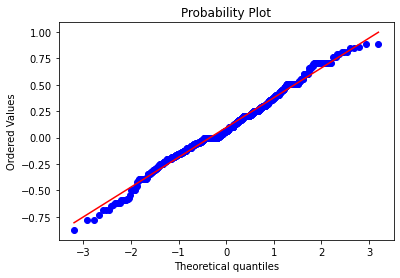

In [90]:
check_distribution(f_f_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.05019365416361104
The mean is: 0.08810819525599138
The std is: 0.27798632662452744
So, data follow a normal distribution.


(0.08810819525599138, 0.27798632662452744)

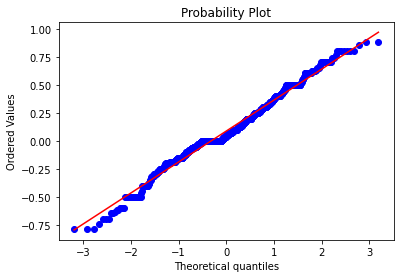

In [91]:
check_distribution(m_f_sample)

-------

<b><u>f-test</u></b>

<b><u>Male sentences</u></b>

In [92]:
f_test(f_m_sample, m_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.096344649098406
The p-value is: 0.07433402410632217
The two variances do not differ in a significant way


(1.096344649098406, 0.07433402410632217)

<b><u>Female sentences</u></b>

In [93]:
f_test(f_f_sample, m_f_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0365675566402932
The p-value is: 0.28636785878107474
The two variances do not differ in a significant way


(1.0365675566402932, 0.28636785878107474)

<b><u>t-test</u></b>

<b><u>Male sentences</u></b>

In [94]:
t_test_independent(f_m_sample, m_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.802608370211317
The two means (0.10136834252848709 0.09796932468917699) do not differ in a significant way.


Ttest_indResult(statistic=0.2500060849986279, pvalue=0.802608370211317)

<b><u>Female sentences</u></b>

In [95]:
t_test_independent(f_f_sample, m_f_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.4989188033652108
The two means (0.09487129979775515 0.0858403220483771) do not differ in a significant way.


Ttest_indResult(statistic=0.6763153678841086, pvalue=0.4989188033652108)

------

<b><u>Samples</u></b>

In [96]:
# Female sentences population dictionary
m_f_scores.extend(m_m_scores)
m_scores = m_f_scores
m_f_labels.extend(m_m_labels)
m_labels = m_f_labels
m_population = {
    "scores":m_scores,
    "labels":m_labels
}
# Male sentences population dictionary
f_f_scores.extend(f_m_scores)
f_scores = f_f_scores
f_f_labels.extend(f_m_labels)
f_labels = f_f_labels

f_population = {
    "scores":f_scores,
    "labels":f_labels
} 

In [97]:
samples = stratified_random_sampling([f_population,m_population], 1000)
f_sample = samples[0]
m_sample = samples[1]

<b><u>Distributions</u></b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.25590905060387503
The mean is: 0.10566372508144349
The std is: 0.29477183135863333
So, data follow a normal distribution.


(0.10566372508144349, 0.29477183135863333)

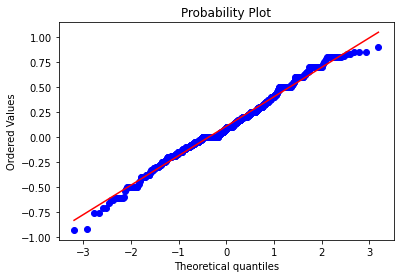

In [98]:
check_distribution(f_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.1151686980258157
The mean is: 0.08151188589441713
The std is: 0.28107281617568247
So, data follow a normal distribution.


(0.08151188589441713, 0.28107281617568247)

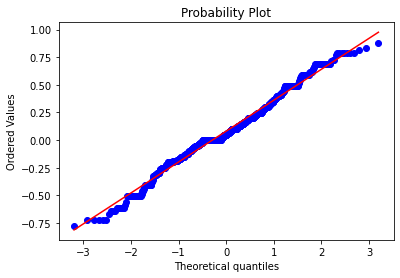

In [99]:
check_distribution(m_sample)

<b><u>f-test</u></b>

In [100]:
f_test(f_sample, m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0998520513360082
The p-value is: 0.06760919532497411
The two variances do not differ in a significant way


(1.0998520513360082, 0.06760919532497411)

<b><u>t-test</u></b>

In [101]:
t_test_independent(f_sample, m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.15199951888273702
The two means (0.10899352975188391 0.08929373592456927) do not differ in a significant way.


Ttest_indResult(statistic=1.4330561852661434, pvalue=0.15199951888273702)

##### 3.4.a) Polarity scores

#### Section 4: Computing some graphs

<span style="color:red">--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### Frequency distributions

#### Visualization Test Word Cloud

<b>Male authors</b>

<b>Female authors</b>

#### Visualization of emotions

In [102]:
dict_df = {
    "emotion": [],
    "female_scores":[],
    "male_scores":[]
}
emotion = []
f_auth = []
m_auth = []

for k in f_emotions:
    dict_df["emotion"].append(k)
    dict_df["female_scores"].append(f_emotions[k])
    dict_df["male_scores"].append(m_emotions[k])
    emotion.append(k)
    f_auth.append(f_emotions[k])
    m_auth.append(m_emotions[k])


emotions_df = pd.DataFrame(dict_df)
emotions_df

,emotion,female_scores,male_scores
0,fear,"[0.05454545454545454, 0.09924385633270322, 0.0...","[0.07417503586800574, 0.08463035019455253, 0.0..."
1,anger,"[0.04344746162927981, 0.05509046718876587, 0.0...","[0.061788617886178863, 0.07320038910505837, 0...."
2,trust,"[0.11782762691853602, 0.10802052389954091, 0.1...","[0.13323768531802965, 0.11065175097276264, 0.1..."
3,surprise,"[0.06139315230224321, 0.04793410748042128, 0.0...","[0.06150167384026781, 0.058365758754863814, 0...."
4,positive,"[0.24179456906729635, 0.1937618147448015, 0.22...","[0.2118125298900048, 0.19455252918287938, 0.23..."
5,negative,"[0.1371900826446281, 0.17121253038077236, 0.12...","[0.14237207077953132, 0.1519941634241245, 0.13..."
6,sadness,"[0.06611570247933884, 0.07844990548204159, 0.0...","[0.06293639406982306, 0.07782101167315175, 0.0..."
7,disgust,"[0.0448642266824085, 0.06602754523359439, 0.03...","[0.04591104734576758, 0.04109922178988327, 0.0..."
8,joy,"[0.11570247933884298, 0.086821496084256, 0.125...","[0.09354375896700143, 0.07928015564202334, 0.1..."
9,anticipation,"[0.11711924439197166, 0.09343775317310289, 0.1...","[0.11272118603538976, 0.12840466926070038, 0.1..."


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (10, 13).

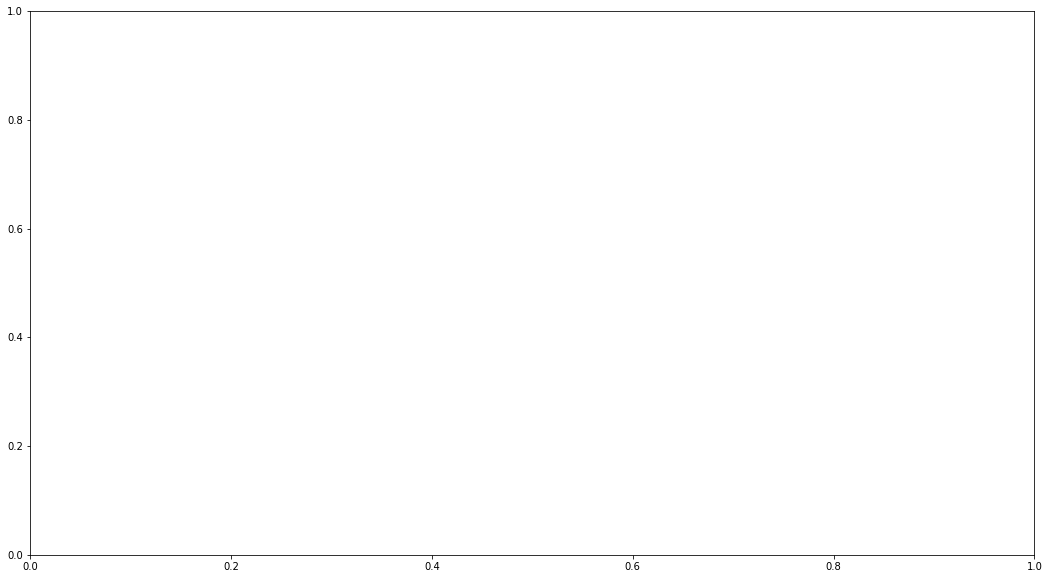

In [103]:
X_axis = np.arange(len(emotion))

f, ax = plt.subplots(figsize=(18,10)) 
plt.bar(X_axis - 0.2, f_auth, 0.4, label = 'Female authors', color=["#FEC9F1"])
plt.bar(X_axis + 0.2, m_auth, 0.4, label = 'Male authors', color=["#A3C4BC"])
  
plt.xticks(X_axis, emotion)
plt.xlabel("Emotions")
plt.ylabel("Emotional value")
plt.title("Emotional values for each corpus")
plt.legend()
plt.show()

Raw/M/1857_tom_browns_school_days.txt


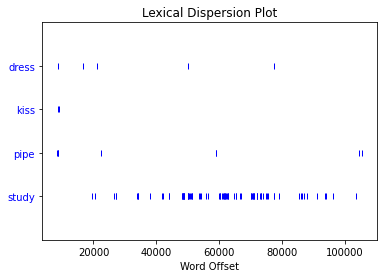

Raw/M/1865_alices_adventures_in_wonderland.txt


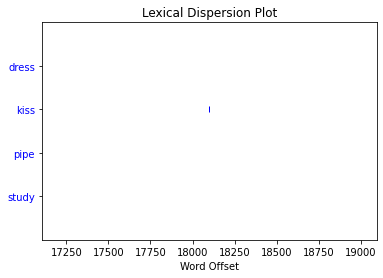

Raw/M/1869_david_copperfield.txt


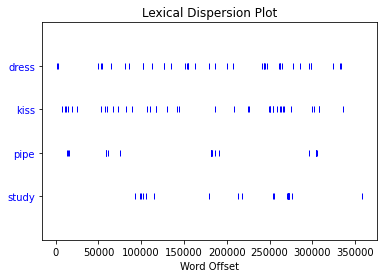

Raw/M/1871_at_the_back_of_the_north_wind.txt


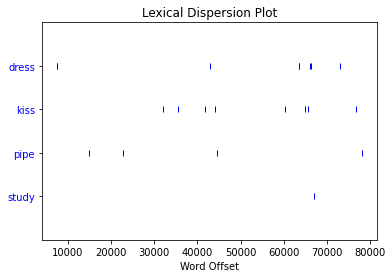

Raw/M/1876_the_adventures_of_tom_sawyer.txt


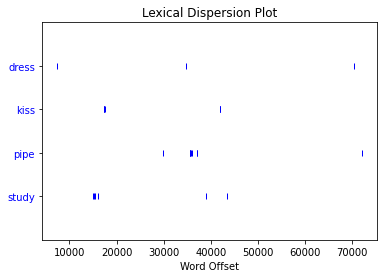

Raw/M/1883_treasure_island.txt


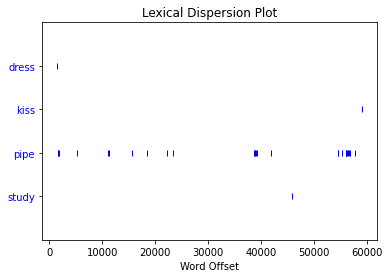

Raw/M/1888_the_happy_prince_and_other_tales.txt


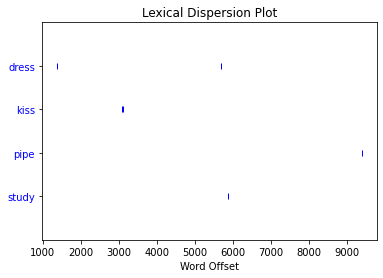

Raw/M/1894_the_jungle_book.txt


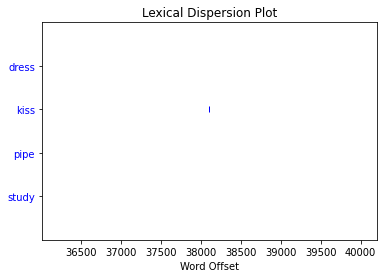

In [ ]:
for url in m_authors_texts:
    print(url)
    text = text_reader(url) 
    word_dispersion_plot(['dress','kiss','pipe','study'], text, remove_punctuation=True)

<span style="color:red">The frequency distribution will be useful in the final part of the analysis in order to se if the different terms have also an evolution in time that may explain their presence.<span>

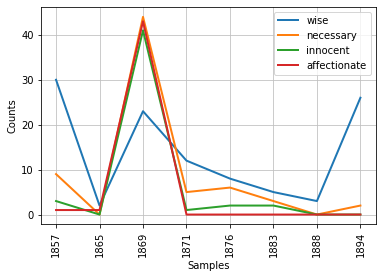

<ConditionalFreqDist with 4 conditions>

In [ ]:
conditional_frequency_distribution(["innocent","affectionate","wise","necessary"], m_corpus)

#### Section 5: Results

#### Section 6: Conclusions